# Tradyflow Analysis

# About the Dataset 

This dataset is obtained from [tradytics.com](https://tradytics.com/trady-flow) on 21st June 2022. 

# What is the Dataset?
This dataset, is the flow of the stock market on the date 17th June 2022. It contains many tickers. An excellent dataset to practice time series and test your data science skills.

# What Do the rows Stand For?
1. **Time** - Time when this ticker was caught in flow.

2. **Sym** - The ticker symbol, e.g AAPL, TSLA, SPY.

3. **C/P** - ***Call*** or ***Put*** trade?

4. **Exp** - The expirtation of the contract.

5. **Str** - The strike price.

6. **Spot** - The stock price at the moment when the flow was reported.

7. **Bidask** - The bidask of the contract

8. **Orders** - The total order of the contract.

9. **Volume** - The number of shares traded at the moment when this contract was caught.

10. **Premiums** - The total money spent on this contract.

11. **Open Interest** - The total number of opened contracts at the moment when this contract was caught.

12. **Diff %** - The % difference between Spot and Strike price.

13. **ITM** - If the contract was a win or loss.


***NoT FINANCIAL ADVICE**

### 1. Import the libraries

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. Import the data

In [2]:
data = pd.read_csv("Trady Flow - Best Options Trade Ideas.csv")
print('Data imported sucessfully')

Data imported sucessfully


In [3]:
# First 5 rows
data.head()

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
0,6/17/2022 15:07,ISEE,Call,10/21/2022,10.0,9.54,5.05,7,360,183.60K,4.07K,4.71,0
1,6/17/2022 15:05,CVNA,Call,1/19/2024,60.0,23.52,4.60,7,634,310.66K,130,155.05,0
2,6/17/2022 14:51,PTLO,Put,2/17/2023,15.0,15.19,3.50,7,800,281.00K,0,1.39,0
3,6/17/2022 14:39,TWLO,Call,6/24/2022,86.0,84.51,2.95,5,722,198.80K,436,2.48,0
4,6/17/2022 13:56,ATUS,Put,9/16/2022,7.0,8.62,0.68,5,6.27K,501.84K,8.63K,23.13,0


In [4]:
# last 5 rows
data.tail()

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
7822,6/7/2021 11:41,INTC,Call,1/21/2022,57.5,56.78,4.62,7,626,291.09K,8.92K,1.23,1
7823,6/7/2021 11:15,RKT,Call,7/16/2021,21.0,19.72,1.38,6,1.24K,188.88K,10.41K,5.34,1
7824,6/7/2021 10:51,IRBT,Put,8/20/2021,100.0,100.62,10.35,5,692,747.48K,4.45K,0.62,1
7825,6/7/2021 10:33,CMCSA,Put,1/20/2023,52.5,57.19,5.27,6,857,467.06K,3.49K,8.92,1
7826,6/7/2021 9:48,SPR,Call,12/17/2021,55.0,50.94,5.40,6,406,219.40K,4.15K,8.08,0


In [5]:
# Shape
data.shape

(7827, 13)

In [6]:
# File suammary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7827 entries, 0 to 7826
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     7827 non-null   object 
 1   Sym      7827 non-null   object 
 2   C/P      7827 non-null   object 
 3   Exp      7827 non-null   object 
 4   Strike   7827 non-null   float64
 5   Spot     7827 non-null   float64
 6   BidAsk   7827 non-null   float64
 7   Orders   7827 non-null   int64  
 8   Vol      7827 non-null   object 
 9   Prems    7827 non-null   object 
 10  OI       7827 non-null   object 
 11  Diff(%)  7827 non-null   float64
 12  ITM      7827 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 795.1+ KB


In [7]:
# File description
data.describe()

,Strike,Spot,BidAsk,Orders,Diff(%),ITM
count,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000
mean,151.178342,148.595490,4.220649,7.109493,11.477625,0.679826
std,358.668235,353.566766,5.207856,5.312003,19.367772,0.466573
min,1.500000,1.230000,0.110000,5.000000,0.020000,0.000000
25%,30.000000,28.270000,1.650000,5.000000,2.110000,0.000000
50%,60.000000,58.950000,3.100000,5.000000,5.600000,1.000000
75%,145.000000,145.160000,5.120000,7.000000,12.715000,1.000000
max,3950.000000,3755.250000,194.350000,124.000000,277.640000,1.000000


In [8]:
# Checking missing values
data.isna().sum()

Time       0
Sym        0
C/P        0
Exp        0
Strike     0
Spot       0
BidAsk     0
Orders     0
Vol        0
Prems      0
OI         0
Diff(%)    0
ITM        0
dtype: int64

No missing values are present in the dataset. So we can proceed further.

### 3. EDA

In [9]:
data[:4]

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
0,6/17/2022 15:07,ISEE,Call,10/21/2022,10.0,9.54,5.05,7,360,183.60K,4.07K,4.71,0
1,6/17/2022 15:05,CVNA,Call,1/19/2024,60.0,23.52,4.60,7,634,310.66K,130,155.05,0
2,6/17/2022 14:51,PTLO,Put,2/17/2023,15.0,15.19,3.50,7,800,281.00K,0,1.39,0
3,6/17/2022 14:39,TWLO,Call,6/24/2022,86.0,84.51,2.95,5,722,198.80K,436,2.48,0


In [10]:
# Find the unique stock name
data.Sym.unique()

array(['ISEE', 'CVNA', 'PTLO', ..., 'RVP', 'BNGO', 'SPR'], dtype=object)

In [11]:
data.Sym.nunique()

1107

In [12]:
data.Sym.value_counts()

F       77
IWM     62
WFC     59
GM      59
SNAP    58
        ..
IR       1
EVH      1
VNOM     1
VFC      1
SPR      1
Name: Sym, Length: 1107, dtype: int64

In [13]:
# Set the plot theme
plt.style.use('fivethirtyeight')

Text(0, 0.5, 'Ticker')

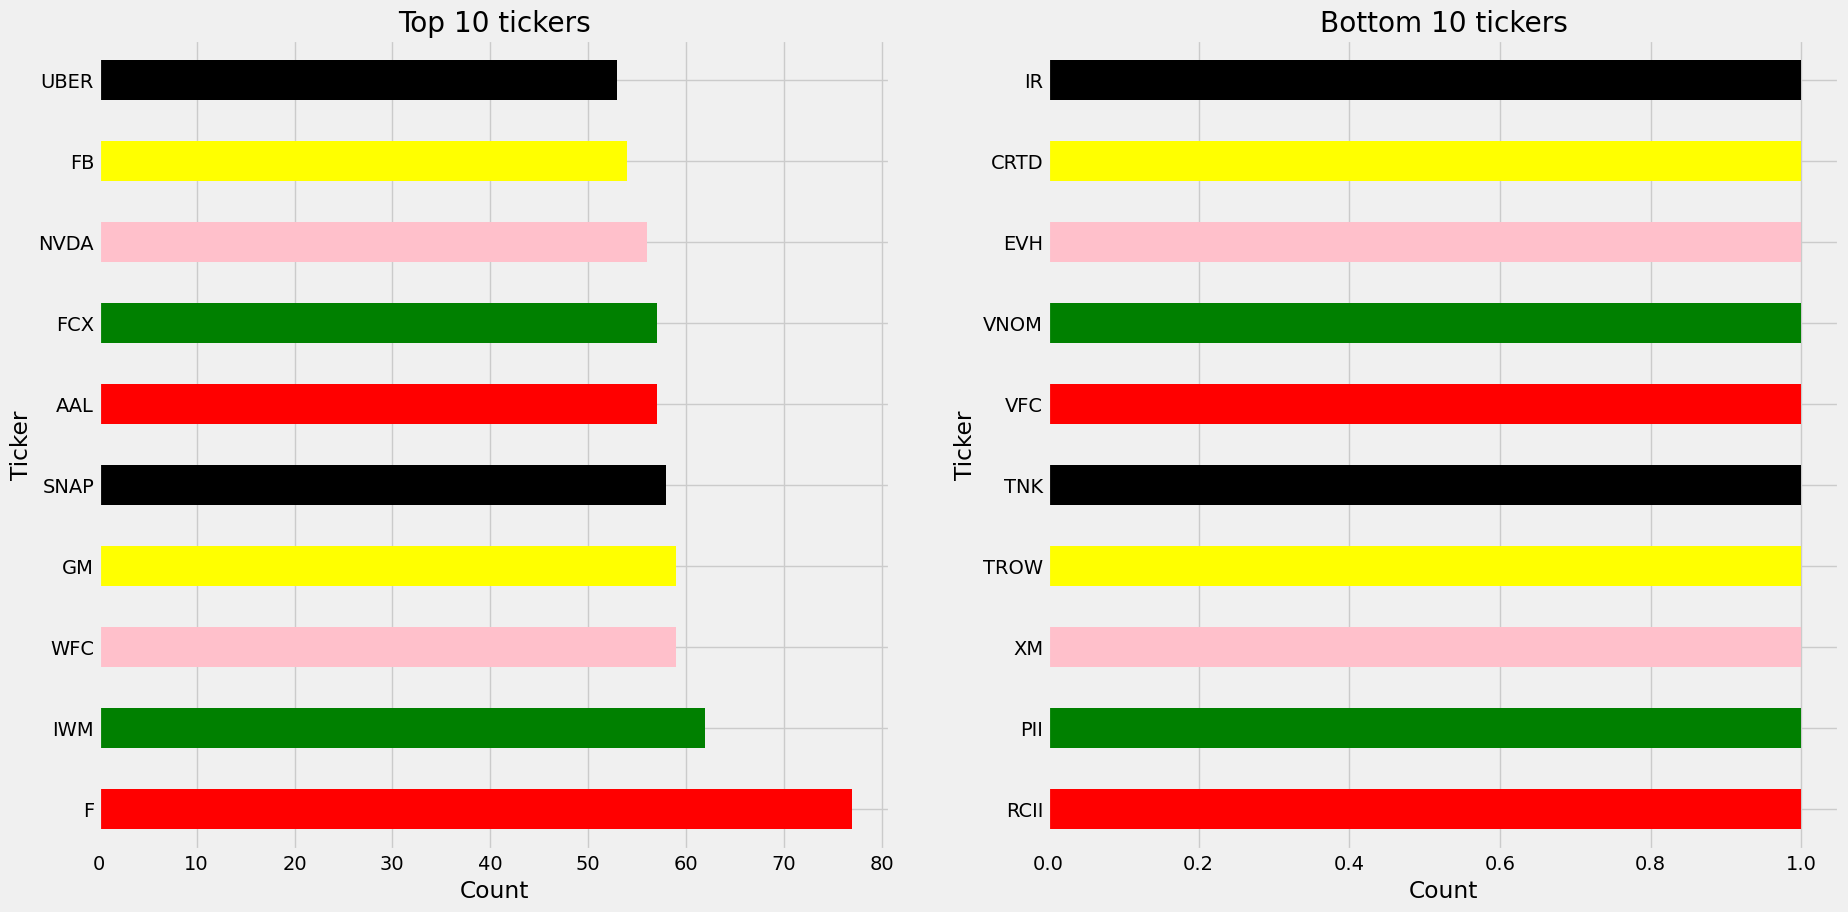

In [14]:
# Now plot the top 10 tickers
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
data.Sym.value_counts(ascending=True).nlargest(10).plot(kind='barh',color=['red','green','pink','yellow','black'])
plt.title('Top 10 tickers')
plt.xlabel('Count')
plt.ylabel('Ticker')

plt.subplot(1,2,2)
data.Sym.value_counts(ascending=True).nsmallest(10).plot(kind='barh',color=['red','green','pink','yellow','black'])
plt.title('Bottom 10 tickers')
plt.xlabel('Count')
plt.ylabel('Ticker')

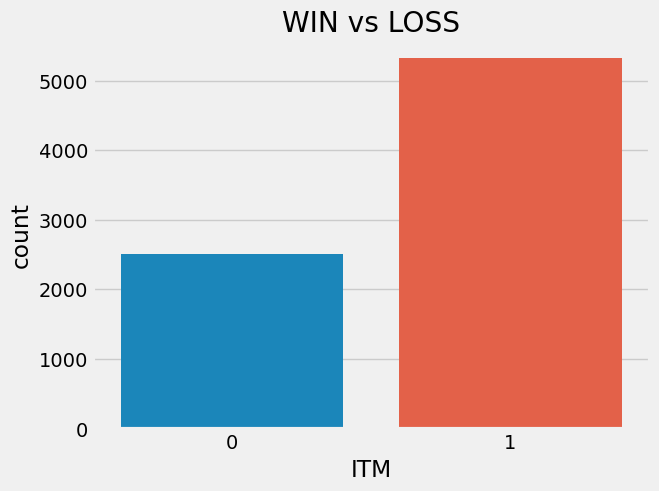

In [15]:
# ITM 
# Plot the win vs loss count
sns.countplot(data=data,x='ITM')
plt.title('WIN vs LOSS')
plt.show()

In the above plot count of win is high.

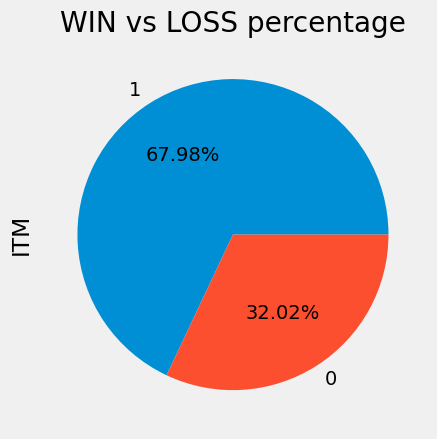

In [16]:
# Plot pie chart for ITM
data.ITM.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('WIN vs LOSS percentage')
plt.show()

We obsrve that more winning percentage that is 67.98%

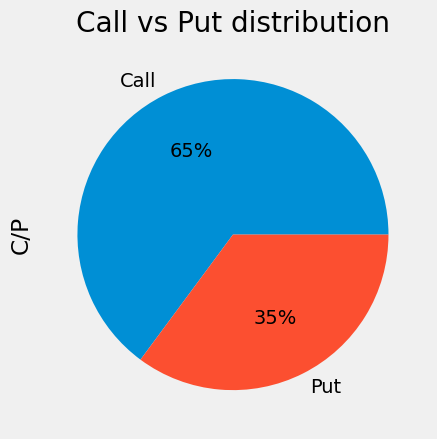

In [17]:
#c/p ratio
data['C/P'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.title('Call vs Put distribution')
plt.show()

In [18]:
data.columns

Index(['Time', 'Sym', 'C/P', 'Exp', 'Strike', 'Spot', 'BidAsk', 'Orders',
       'Vol', 'Prems', 'OI', 'Diff(%)', 'ITM'],
      dtype='object')

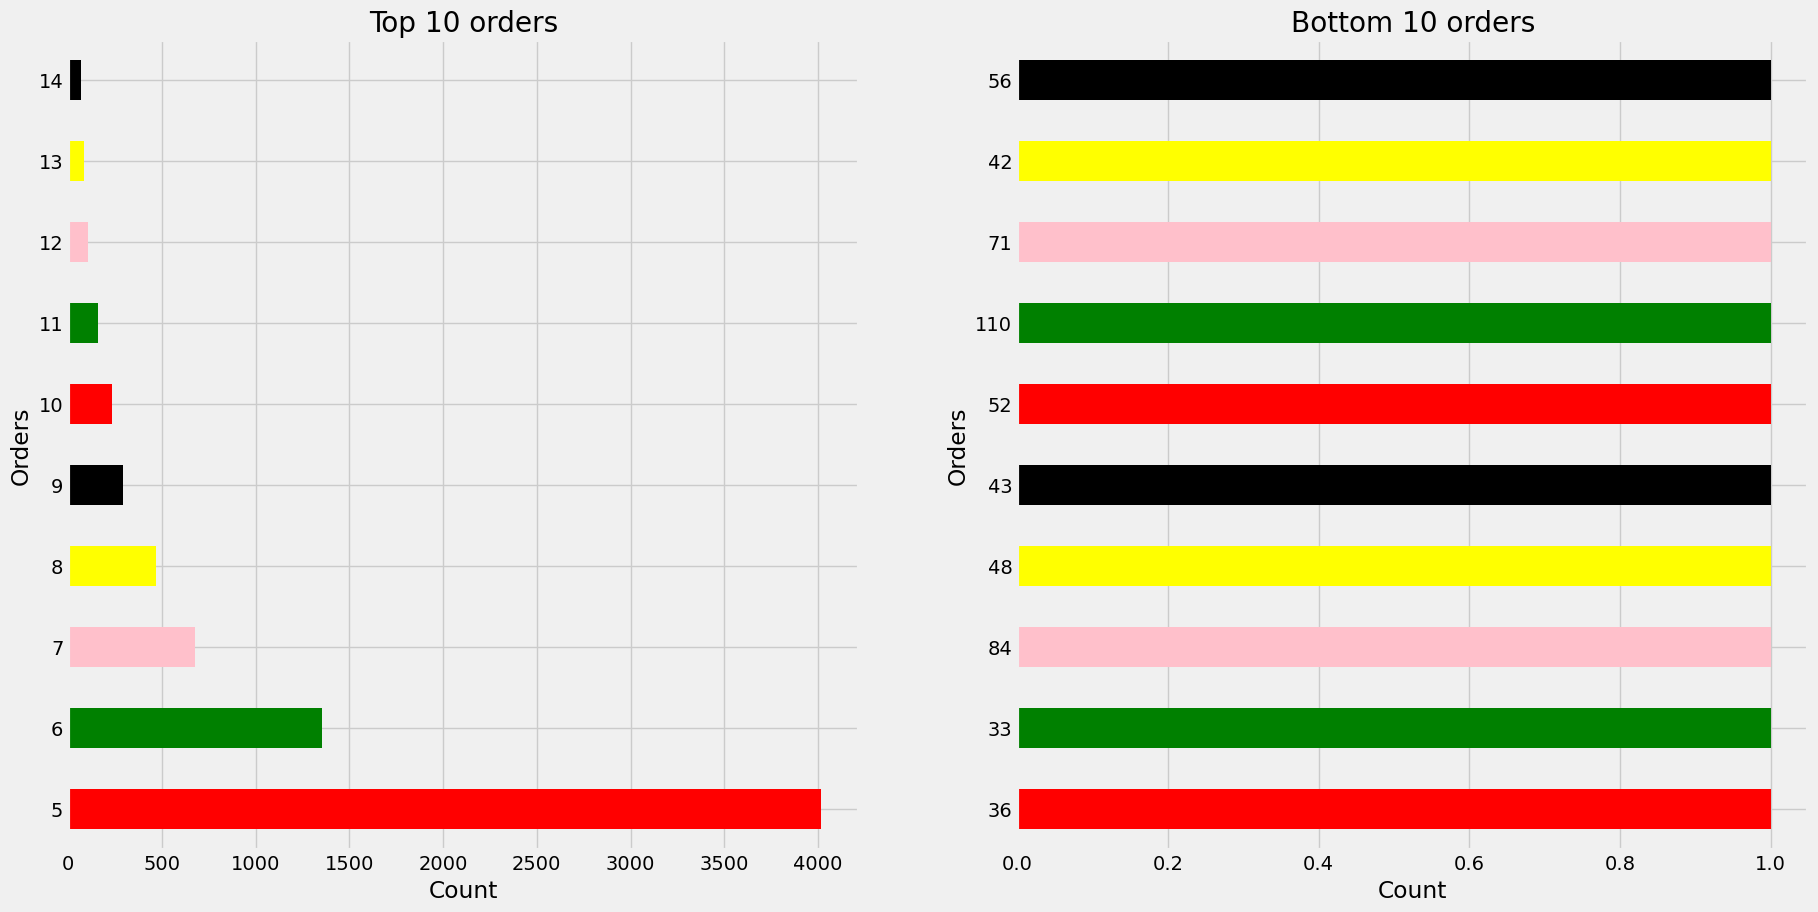

In [19]:
# Get the top 10 orders
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
data.Orders.value_counts(ascending=True).nlargest(10).plot(kind='barh',color=['red','green','pink','yellow','black'])
plt.title('Top 10 orders')
plt.xlabel('Count')
plt.ylabel('Orders')

plt.subplot(1,2,2)
data.Orders.value_counts(ascending=True).nsmallest(10).plot(kind='barh',color=['red','green','pink','yellow','black'])
plt.title('Bottom 10 orders')
plt.xlabel('Count')
plt.ylabel('Orders')

#save the figure
plt.savefig('Orders')
plt.show()

Text(0.5, 1.0, 'Call and put realitionship with ITM')

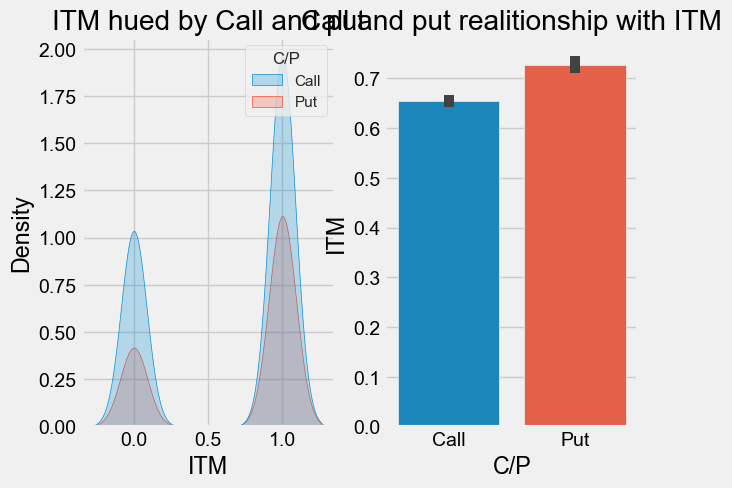

In [20]:
# Call/put realtionship with ITM
fig,axes = plt.subplots(1,2)

# set plotting size
sns.set(rc={'figure.figsize':(15,8)})
plt.style.use('fivethirtyeight')

# Plot the seaborn KDE plot
sns.kdeplot(data=data,x='ITM',hue='C/P',shade=True,ax=axes[0]).set_title('ITM hued by Call and put')
sns.barplot(data=data,x='C/P',y='ITM',ax=axes[1]).set_title('Call and put realitionship with ITM')

### Filter system below

In [21]:
data.head()

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
0,6/17/2022 15:07,ISEE,Call,10/21/2022,10.0,9.54,5.05,7,360,183.60K,4.07K,4.71,0
1,6/17/2022 15:05,CVNA,Call,1/19/2024,60.0,23.52,4.60,7,634,310.66K,130,155.05,0
2,6/17/2022 14:51,PTLO,Put,2/17/2023,15.0,15.19,3.50,7,800,281.00K,0,1.39,0
3,6/17/2022 14:39,TWLO,Call,6/24/2022,86.0,84.51,2.95,5,722,198.80K,436,2.48,0
4,6/17/2022 13:56,ATUS,Put,9/16/2022,7.0,8.62,0.68,5,6.27K,501.84K,8.63K,23.13,0


In [22]:
# make the needed group
ticker_group = data.groupby(['Sym'])
call_put_group = data.groupby(['C/P'])
orders_group = data.groupby(['Orders'])

In [23]:
tickers = data['Sym'].value_counts()
tickers = tickers.to_frame()
tickers

,Sym
F,77
IWM,62
WFC,59
GM,59
SNAP,58
...,...
IR,1
EVH,1
VNOM,1
VFC,1


In [24]:
# Stock with 1M+ premiumns
stock_1M_premium = ticker_group['Prems'].apply(lambda x:x.str.contains('M').sum())
stock_1M_premium = stock_1M_premium.to_frame()
stock_1M_premium

,Prems
Sym,
A,0
AA,3
AAL,1
AAPL,12
ABBV,4
...,...
ZLAB,0
ZM,4
ZNGA,0


In [25]:
# now join the 2 data
oneM_ticker_df = tickers.join(stock_1M_premium)
oneM_ticker_df

,Sym,Prems
F,77,10
IWM,62,58
WFC,59,3
GM,59,4
SNAP,58,17
...,...,...
IR,1,0
EVH,1,0
VNOM,1,1
VFC,1,0


In [26]:
# Now change the column name
oneM_ticker_df.rename(columns={'Sym':'Number of mentions','Prems':'Number of 1 Miliimum Premium'},inplace=True)

In [27]:
oneM_ticker_df

,Number of mentions,Number of 1 Miliimum Premium
F,77,10
IWM,62,58
WFC,59,3
GM,59,4
SNAP,58,17
...,...,...
IR,1,0
EVH,1,0
VNOM,1,1
VFC,1,0


In [28]:
# Ask user which ticker they wish to see
ticker_inputed_by_user = input('Enter the ticker name : ').split()
print(ticker_inputed_by_user)

Enter the ticker name : TSLA AAPL 
['TSLA', 'AAPL']


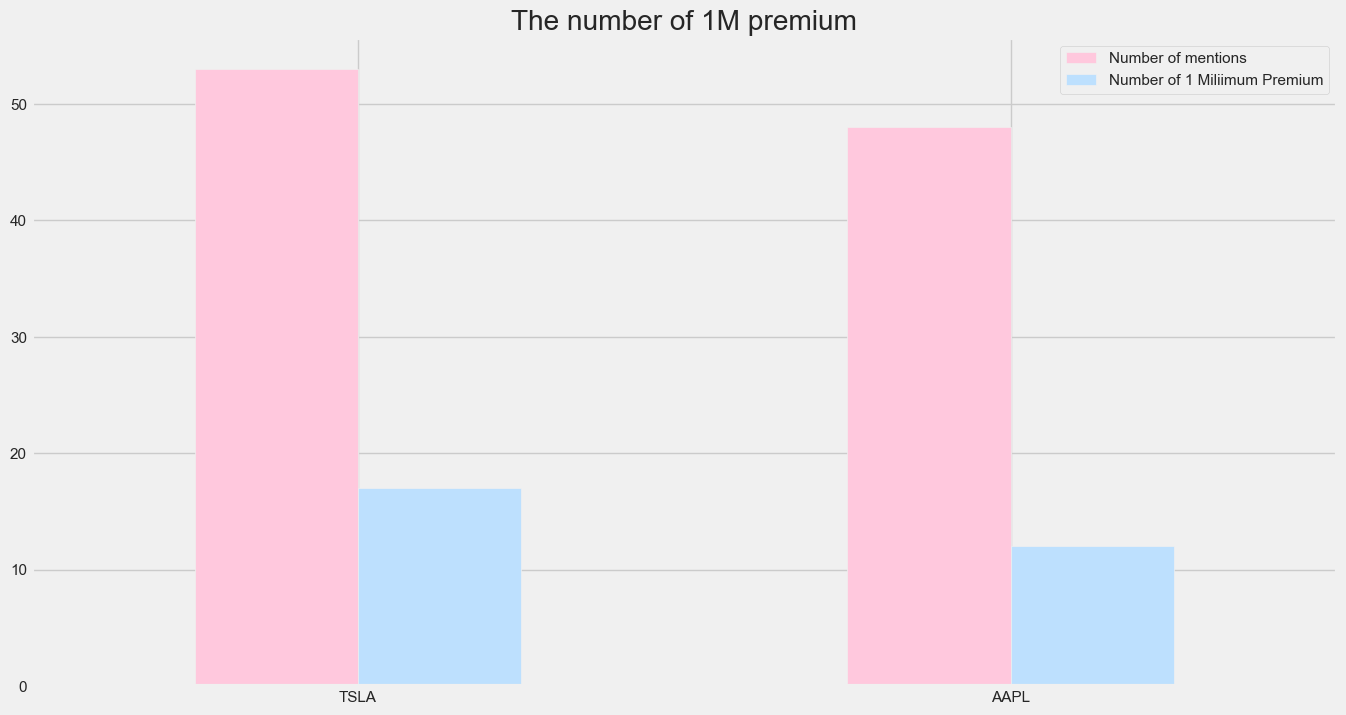

In [29]:
#get a function call
# get them in a function

def one_million_premium_ticker(ticker_name):
    return pd.DataFrame(oneM_ticker_df.loc[ticker_name]).plot.bar(color=["#ffc8dd", "#bde0fe"])

one_million_premium_ticker(ticker_inputed_by_user)
plt.xticks(rotation=360)
plt.title('The number of 1M premium')
plt.show()

In [30]:
# Convert k and M into thousands and million 
data[:10]

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
0,6/17/2022 15:07,ISEE,Call,10/21/2022,10.0,9.54,5.05,7,360,183.60K,4.07K,4.71,0
1,6/17/2022 15:05,CVNA,Call,1/19/2024,60.0,23.52,4.60,7,634,310.66K,130,155.05,0
2,6/17/2022 14:51,PTLO,Put,2/17/2023,15.0,15.19,3.50,7,800,281.00K,0,1.39,0
3,6/17/2022 14:39,TWLO,Call,6/24/2022,86.0,84.51,2.95,5,722,198.80K,436,2.48,0
4,6/17/2022 13:56,ATUS,Put,9/16/2022,7.0,8.62,0.68,5,6.27K,501.84K,8.63K,23.13,0
5,6/17/2022 13:38,WE,Put,8/19/2022,5.0,5.41,0.83,6,2.18K,187.91K,0,8.27,0
6,6/17/2022 13:19,FSR,Put,8/19/2022,7.5,8.65,0.97,9,3.17K,342.79K,2.52K,15.40,0
7,6/17/2022 12:42,PINS,Put,1/20/2023,17.5,17.68,3.73,16,1.69K,637.46K,5.51K,1.02,0
8,6/17/2022 12:32,ET,Call,1/19/2024,10.0,9.84,1.53,6,1.20K,186.16K,44.72K,1.75,0
9,6/17/2022 12:26,WFC,Call,1/19/2024,40.0,38.31,6.15,5,250,152.25K,12.99K,4.98,0


In [31]:
data['Vol'] = data['Vol'].replace({'K':'*1e3','M':'*1e6'},regex=True).map(pd.eval).astype(int)

In [32]:
data[:11]

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
0,6/17/2022 15:07,ISEE,Call,10/21/2022,10.0,9.54,5.05,7,360,183.60K,4.07K,4.71,0
1,6/17/2022 15:05,CVNA,Call,1/19/2024,60.0,23.52,4.60,7,634,310.66K,130,155.05,0
2,6/17/2022 14:51,PTLO,Put,2/17/2023,15.0,15.19,3.50,7,800,281.00K,0,1.39,0
3,6/17/2022 14:39,TWLO,Call,6/24/2022,86.0,84.51,2.95,5,722,198.80K,436,2.48,0
4,6/17/2022 13:56,ATUS,Put,9/16/2022,7.0,8.62,0.68,5,6270,501.84K,8.63K,23.13,0
5,6/17/2022 13:38,WE,Put,8/19/2022,5.0,5.41,0.83,6,2180,187.91K,0,8.27,0
6,6/17/2022 13:19,FSR,Put,8/19/2022,7.5,8.65,0.97,9,3170,342.79K,2.52K,15.40,0
7,6/17/2022 12:42,PINS,Put,1/20/2023,17.5,17.68,3.73,16,1690,637.46K,5.51K,1.02,0
8,6/17/2022 12:32,ET,Call,1/19/2024,10.0,9.84,1.53,6,1200,186.16K,44.72K,1.75,0
9,6/17/2022 12:26,WFC,Call,1/19/2024,40.0,38.31,6.15,5,250,152.25K,12.99K,4.98,0


In [33]:
# Now apply for OI and Prems column
data['OI'] = data['OI'].replace({'K':'*1e3','M':'*1e6'},regex=True).map(pd.eval).astype(int)
data['Prems'] = data['Prems'].replace({'K':'*1e3','M':'*1e6'},regex=True).map(pd.eval).astype(int)

In [34]:
data.head()

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
0,6/17/2022 15:07,ISEE,Call,10/21/2022,10.0,9.54,5.05,7,360,183600,4070,4.71,0
1,6/17/2022 15:05,CVNA,Call,1/19/2024,60.0,23.52,4.60,7,634,310660,130,155.05,0
2,6/17/2022 14:51,PTLO,Put,2/17/2023,15.0,15.19,3.50,7,800,281000,0,1.39,0
3,6/17/2022 14:39,TWLO,Call,6/24/2022,86.0,84.51,2.95,5,722,198800,436,2.48,0
4,6/17/2022 13:56,ATUS,Put,9/16/2022,7.0,8.62,0.68,5,6270,501840,8630,23.13,0


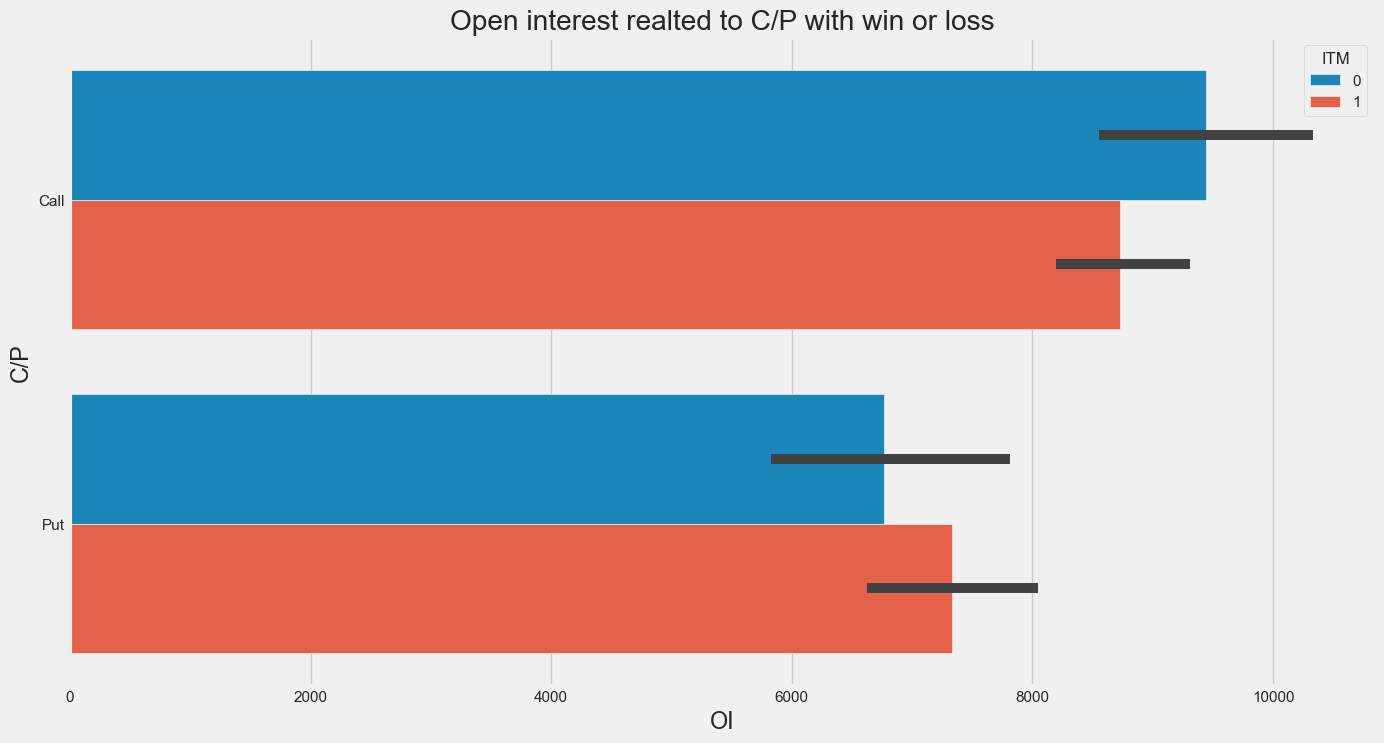

In [35]:
# Does more OI mean more C/P and more WINS (1) or LOSSES (0)
sns.barplot(data=data,x='OI',y='C/P',hue='ITM').set_title('Open interest realted to C/P with win or loss')
plt.show()

We see that from above plot call contracts are more in losses.

Put contracts have more chance to win.

In [36]:
# Filter the stocks with given data
print(ticker_inputed_by_user)
filtered_premium = 1000000
filtered_orders = 5
filtered_stock = (data['Prems'] >= 1000000) & (data['Sym'].isin(ticker_inputed_by_user)) & (data['Orders'] >= filtered_orders)

['TSLA', 'AAPL']


In [37]:
filtered_stock

0       False
1       False
2       False
3       False
4       False
        ...  
7822    False
7823    False
7824    False
7825    False
7826    False
Length: 7827, dtype: bool

In [38]:
pd.DataFrame(data.loc[filtered_stock])

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
60,6/15/2022 9:31,TSLA,Put,6/17/2022,650.0,656.53,21.35,5,524,1120000,15270,1.07,1
1671,1/24/2022 9:31,AAPL,Call,1/20/2023,200.0,160.34,7.55,18,1450,1100000,54710,24.90,0
2390,11/22/2021 9:37,AAPL,Call,11/26/2021,165.0,162.79,1.13,43,15880,1880000,35900,1.39,1
2977,11/4/2021 9:30,TSLA,Put,11/12/2021,1100.0,1234.58,19.18,5,971,1930000,10970,12.23,1
3302,10/26/2021 14:21,TSLA,Call,10/29/2021,1050.0,1022.30,15.18,5,946,1400000,25080,2.80,1
3325,10/26/2021 12:34,TSLA,Call,3/18/2022,1250.0,1037.52,56.05,5,466,2640000,4980,20.51,0
3326,10/26/2021 12:17,AAPL,Call,1/19/2024,190.0,149.74,13.12,8,800,1050000,3730,26.89,0
3328,10/26/2021 12:04,TSLA,Call,3/18/2022,1225.0,1033.01,61.77,5,509,3180000,5670,18.46,1
3382,10/25/2021 13:28,AAPL,Put,11/19/2021,148.0,148.77,3.32,8,7770,2600000,2160,0.53,1
3420,10/22/2021 14:14,TSLA,Call,10/29/2021,910.0,907.81,17.52,8,1200,2100000,3890,0.23,1


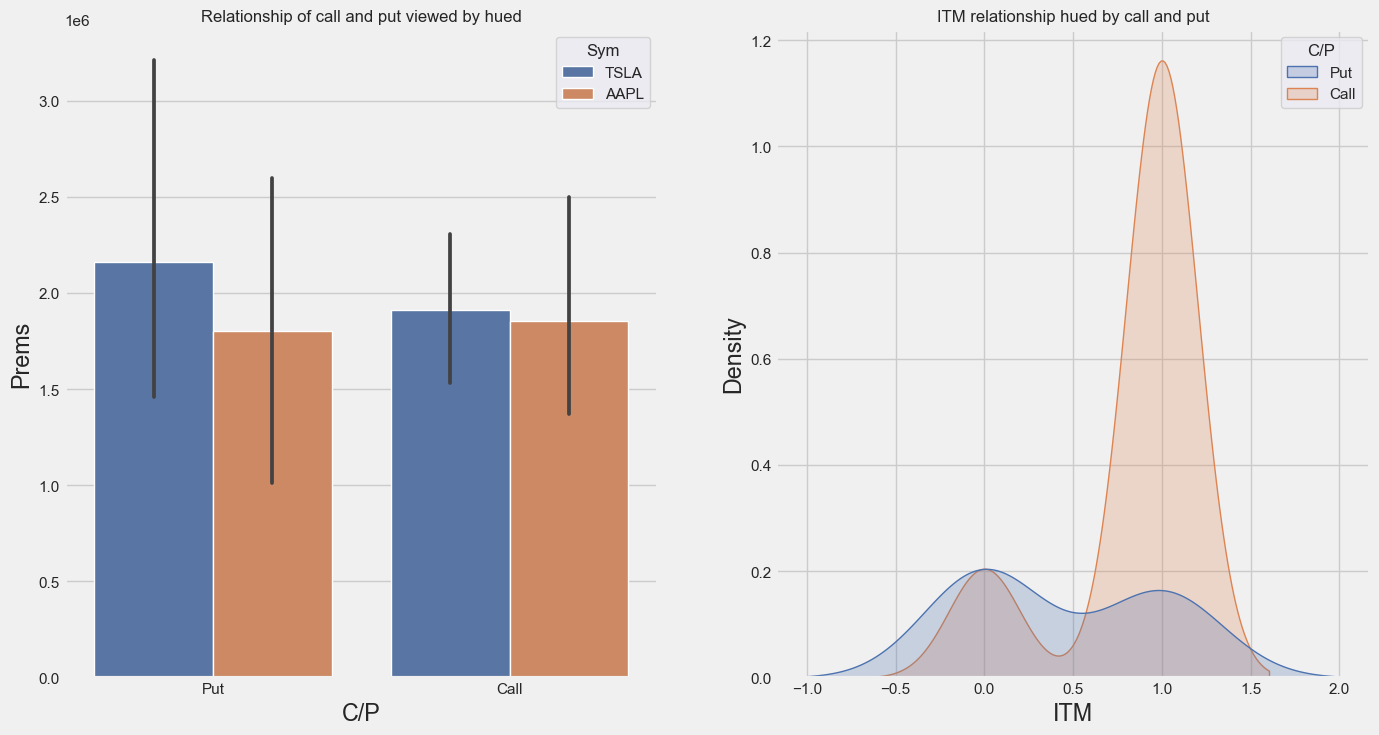

In [39]:
# Plot the graph

fig, axes = plt.subplots(1,2)
sns.set(rc = {'figure.figsize' : (15,8)})

# Plot the graph
sns.barplot(data=data.loc[filtered_stock],x='C/P',y='Prems',hue='Sym',ax=axes[0]).set_title('Relationship of call and put viewed by hued')
sns.kdeplot(data=data.loc[filtered_stock],x='ITM',hue='C/P',ax=axes[1],shade=True).set_title('ITM relationship hued by call and put')

# Save the fig
plt.savefig('Filtered_stock_relation')
plt.show()

In [40]:
# CONTRACTS only in between expiry i.e. contracts only after 2022-10-21 with tickers
from datetime import datetime
data['Exp'] = pd.to_datetime(data['Exp'],dayfirst=True)
date = "2022-10-21"

date_filter = (data['Exp'] >= "2022-10-21") & (data['Sym'].isin(['ISEE','AMZN']))
data.loc[date_filter]

C:\Users\sai\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '10/21/2022' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\sai\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '11/18/2022' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\sai\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '12/16/2022' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\sai\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '12/15/2023' in MM/DD/YYYY format. Provide format or specify infer_

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
0,6/17/2022 15:07,ISEE,Call,2022-10-21,10.0,9.54,5.05,7,360,183600,4070,4.71,0
1032,3/18/2022 9:52,ISEE,Call,2022-10-21,25.0,16.75,5.65,6,1030,585390,631,49.21,0
1172,3/8/2022 9:43,AMZN,Call,2022-11-03,2900.0,2763.03,10.93,6,725,597220,2660,5.91,1


In [41]:
date_filter_1 = (data['Exp'] >= "2022-10-21") & (data['Sym'].isin(ticker_inputed_by_user))
data.loc[date_filter_1]

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
440,5/11/2022 9:31,AAPL,Call,2023-06-16,170.0,154.16,15.90,5,404,646400,16360,10.38,0
1671,1/24/2022 9:31,AAPL,Call,2023-01-20,200.0,160.34,7.55,18,1450,1100000,54710,24.90,0
2569,11/16/2021 9:45,AAPL,Call,2023-01-20,200.0,150.15,4.97,8,823,411500,36320,33.27,0
3326,10/26/2021 12:17,AAPL,Call,2024-01-19,190.0,149.74,13.12,8,800,1050000,3730,26.89,0
